In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns

df = pd.read_csv('raw_data/raw_data_FINAL_ALL.csv')
# features and target selection
X_scaled = pd.DataFrame()
#X_scaled = df.drop(columns=['Ratio ticker sp500'])
#X_scaled = X_scaled.set_index('Ticker')


#selecting just the 40 first columns (data for the year 23)

df_reduced = df[df.columns[:42].to_list()]

df_target =  pd.read_csv('raw_data/tickers_target_ALL.csv')

df_other = pd.read_csv('raw_data/nasdaq_tickers_raw.csv')

In [2]:
df_reduced.columns

Index(['Ticker', '2023 Ordinary Shares Number', '2023 Share Issued',
       '2023 Net Debt', '2023 Total Debt', '2023 Tangible Book Value',
       '2023 Invested Capital', '2023 Working Capital',
       '2023 Net Tangible Assets', '2023 Common Stock Equity',
       '2023 Total Capitalization',
       '2023 Total Equity Gross Minority Interest', '2023 Minority Interest',
       '2023 Stockholders Equity',
       '2023 Gains Losses Not Affecting Retained Earnings',
       '2023 Other Equity Adjustments', '2023 Retained Earnings',
       '2023 Additional Paid In Capital', '2023 Capital Stock',
       '2023 Common Stock', '2023 Preferred Stock',
       '2023 Total Liabilities Net Minority Interest',
       '2023 Total Non Current Liabilities Net Minority Interest',
       '2023 Other Non Current Liabilities', '2023 Employee Benefits',
       '2023 Non Current Pension And Other Postretirement Benefit Plans',
       '2023 Long Term Debt And Capital Lease Obligation',
       '2023 Long Term D

In [3]:
columns_relevant = ['Ticker','2023 Stockholders Equity','2023 Total Debt','2023 Current Liabilities','2023 Total Assets','2023 Working Capital']
df_reduced = df[columns_relevant]

In [4]:
#drop columns that have more than 30% of missing data:
def remove_shitty_columns(df):
    for column in df.columns:
        if df[column].isnull().sum()/len(df) > 0.3:
            df.drop(columns=[column], inplace=True)
    return df

#drop rows that have more than 30% of missing values
def remove_shitty_rows(df):
    threshold = 0.3 * df.shape[1]  # Calculate the threshold for missing values
    df = df.dropna(thresh=int(df.shape[1] - threshold))
    return df
#FINAL CLEANING FUNCTION
def clean_dataframe(df):
    df = remove_shitty_columns(df)
    df = remove_shitty_rows(df)
    df = df.reset_index(drop=True)
    return df

In [5]:
df_cleaned = clean_dataframe(df_reduced)

In [6]:
df_other.rename(columns={'Symbol': 'Ticker'}, inplace = True)

In [7]:
df_other

,Ticker,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,$145.48,-2.7300,-1.842%,4.263368e+10,United States,1999.0,1593543,Industrials,Electrical Products
1,AA,Alcoa Corporation Common Stock,$43.93,0.7300,1.69%,7.888057e+09,United States,2016.0,5272723,Industrials,Aluminum
2,AACG,ATA Creativity Global American Depositary Shares,$0.85,0.0098,1.166%,2.720011e+07,China,2008.0,12048,Real Estate,Other Consumer Services
3,AACI,Armada Acquisition Corp. I Common Stock,$11.3642,-0.0058,-0.051%,0.000000e+00,United States,2021.0,3672,Finance,Blank Checks
4,AACIW,Armada Acquisition Corp. I Warrant,$0.1707,0.0108,6.754%,0.000000e+00,United States,2021.0,25825,Finance,Blank Checks
...,...,...,...,...,...,...,...,...,...,...,...
7128,ZVRA,Zevra Therapeutics Inc. Common Stock,$4.595,0.0350,0.768%,1.923168e+08,United States,NaN,271570,Health Care,Biotechnology: Pharmaceutical Preparations
7129,ZVSA,ZyVersa Therapeutics Inc. Common Stock,$4.2664,0.0128,0.301%,3.562000e+06,United States,2022.0,30162,Health Care,Biotechnology: Pharmaceutical Preparations
7130,ZWS,Zurn Elkay Water Solutions Corporation Common ...,$30.46,-0.8300,-2.653%,5.260346e+09,United States,2012.0,820408,Industrials,Industrial Machinery/Components
7131,ZYME,Zymeworks Inc. Common Stock,$8.48,-0.2300,-2.641%,5.995775e+08,United States,NaN,555490,Health Care,Biotechnology: Pharmaceutical Preparations


In [8]:
df = df_target.merge(df_cleaned,how= 'inner', on='Ticker')


In [9]:
df

,Unnamed: 0,Ticker,Ratio ticker sp500,2023 Stockholders Equity,2023 Total Debt,2023 Current Liabilities,2023 Total Assets,2023 Working Capital
0,0,A,0.951659,5.845000e+09,2.735000e+09,1.603000e+09,1.076300e+10,2.583000e+09
1,1,AA,0.863139,4.251000e+09,1.915000e+09,3.030000e+09,1.415500e+10,1.375000e+09
2,2,AACG,0.489011,1.130379e+08,2.260687e+07,3.144025e+08,4.489391e+08,-2.439576e+08
3,3,AACI,0.869077,1.683079e+07,2.564439e+06,8.587123e+06,2.541792e+07,-8.493234e+06
4,4,AACIW,NaN,1.683079e+07,2.564439e+06,8.587123e+06,2.541792e+07,-8.493234e+06
...,...,...,...,...,...,...,...,...
5974,6328,ZUO,0.971389,9.716000e+07,2.575670e+08,3.116190e+08,6.685980e+08,2.069330e+08
5975,6329,ZVIA,0.216835,8.987800e+07,1.948000e+06,2.771700e+07,9.085700e+07,5.497000e+07
5976,6331,ZVSA,0.029488,1.107460e+07,8.656000e+03,1.019477e+07,2.211428e+07,-6.841639e+06
5977,6332,ZYME,0.780059,4.648060e+08,2.672200e+07,5.576300e+07,5.808800e+08,3.571630e+08


In [10]:
df_other

,Ticker,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,$145.48,-2.7300,-1.842%,4.263368e+10,United States,1999.0,1593543,Industrials,Electrical Products
1,AA,Alcoa Corporation Common Stock,$43.93,0.7300,1.69%,7.888057e+09,United States,2016.0,5272723,Industrials,Aluminum
2,AACG,ATA Creativity Global American Depositary Shares,$0.85,0.0098,1.166%,2.720011e+07,China,2008.0,12048,Real Estate,Other Consumer Services
3,AACI,Armada Acquisition Corp. I Common Stock,$11.3642,-0.0058,-0.051%,0.000000e+00,United States,2021.0,3672,Finance,Blank Checks
4,AACIW,Armada Acquisition Corp. I Warrant,$0.1707,0.0108,6.754%,0.000000e+00,United States,2021.0,25825,Finance,Blank Checks
...,...,...,...,...,...,...,...,...,...,...,...
7128,ZVRA,Zevra Therapeutics Inc. Common Stock,$4.595,0.0350,0.768%,1.923168e+08,United States,NaN,271570,Health Care,Biotechnology: Pharmaceutical Preparations
7129,ZVSA,ZyVersa Therapeutics Inc. Common Stock,$4.2664,0.0128,0.301%,3.562000e+06,United States,2022.0,30162,Health Care,Biotechnology: Pharmaceutical Preparations
7130,ZWS,Zurn Elkay Water Solutions Corporation Common ...,$30.46,-0.8300,-2.653%,5.260346e+09,United States,2012.0,820408,Industrials,Industrial Machinery/Components
7131,ZYME,Zymeworks Inc. Common Stock,$8.48,-0.2300,-2.641%,5.995775e+08,United States,NaN,555490,Health Care,Biotechnology: Pharmaceutical Preparations


In [11]:
df = df.merge(df_other, how= 'inner', on='Ticker')

In [12]:
df

,Unnamed: 0,Ticker,Ratio ticker sp500,2023 Stockholders Equity,2023 Total Debt,2023 Current Liabilities,2023 Total Assets,2023 Working Capital,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,0,A,0.951659,5.845000e+09,2.735000e+09,1.603000e+09,1.076300e+10,2.583000e+09,Agilent Technologies Inc. Common Stock,$145.48,-2.7300,-1.842%,4.263368e+10,United States,1999.0,1593543,Industrials,Electrical Products
1,1,AA,0.863139,4.251000e+09,1.915000e+09,3.030000e+09,1.415500e+10,1.375000e+09,Alcoa Corporation Common Stock,$43.93,0.7300,1.69%,7.888057e+09,United States,2016.0,5272723,Industrials,Aluminum
2,2,AACG,0.489011,1.130379e+08,2.260687e+07,3.144025e+08,4.489391e+08,-2.439576e+08,ATA Creativity Global American Depositary Shares,$0.85,0.0098,1.166%,2.720011e+07,China,2008.0,12048,Real Estate,Other Consumer Services
3,3,AACI,0.869077,1.683079e+07,2.564439e+06,8.587123e+06,2.541792e+07,-8.493234e+06,Armada Acquisition Corp. I Common Stock,$11.3642,-0.0058,-0.051%,0.000000e+00,United States,2021.0,3672,Finance,Blank Checks
4,4,AACIW,NaN,1.683079e+07,2.564439e+06,8.587123e+06,2.541792e+07,-8.493234e+06,Armada Acquisition Corp. I Warrant,$0.1707,0.0108,6.754%,0.000000e+00,United States,2021.0,25825,Finance,Blank Checks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5974,6328,ZUO,0.971389,9.716000e+07,2.575670e+08,3.116190e+08,6.685980e+08,2.069330e+08,Zuora Inc. Class A Common Stock,$9.72,0.1500,1.567%,1.419120e+09,United States,2018.0,1561743,Technology,EDP Services
5975,6329,ZVIA,0.216835,8.987800e+07,1.948000e+06,2.771700e+07,9.085700e+07,5.497000e+07,Zevia PBC Class A Common Stock,$0.89,-0.0181,-1.993%,6.434510e+07,United States,2021.0,113316,Consumer Staples,Beverages (Production/Distribution)
5976,6331,ZVSA,0.029488,1.107460e+07,8.656000e+03,1.019477e+07,2.211428e+07,-6.841639e+06,ZyVersa Therapeutics Inc. Common Stock,$4.2664,0.0128,0.301%,3.562000e+06,United States,2022.0,30162,Health Care,Biotechnology: Pharmaceutical Preparations
5977,6332,ZYME,0.780059,4.648060e+08,2.672200e+07,5.576300e+07,5.808800e+08,3.571630e+08,Zymeworks Inc. Common Stock,$8.48,-0.2300,-2.641%,5.995775e+08,United States,NaN,555490,Health Care,Biotechnology: Pharmaceutical Preparations


In [13]:
df.drop(columns=['Unnamed: 0'], inplace = True)

In [14]:
df.columns

Index(['Ticker', 'Ratio ticker sp500', '2023 Stockholders Equity',
       '2023 Total Debt', '2023 Current Liabilities', '2023 Total Assets',
       '2023 Working Capital', 'Name', 'Last Sale', 'Net Change', '% Change',
       'Market Cap', 'Country', 'IPO Year', 'Volume', 'Sector', 'Industry'],
      dtype='object')

In [15]:
df_fin = df[[ 'Ticker', 'Ratio ticker sp500','2023 Stockholders Equity', '2023 Total Debt',
       '2023 Current Liabilities', '2023 Total Assets', '2023 Working Capital', 'Net Change', 'Market Cap', 'Volume']]

In [16]:
df_fin 

,Ticker,Ratio ticker sp500,2023 Stockholders Equity,2023 Total Debt,2023 Current Liabilities,2023 Total Assets,2023 Working Capital,Net Change,Market Cap,Volume
0,A,0.951659,5.845000e+09,2.735000e+09,1.603000e+09,1.076300e+10,2.583000e+09,-2.7300,4.263368e+10,1593543
1,AA,0.863139,4.251000e+09,1.915000e+09,3.030000e+09,1.415500e+10,1.375000e+09,0.7300,7.888057e+09,5272723
2,AACG,0.489011,1.130379e+08,2.260687e+07,3.144025e+08,4.489391e+08,-2.439576e+08,0.0098,2.720011e+07,12048
3,AACI,0.869077,1.683079e+07,2.564439e+06,8.587123e+06,2.541792e+07,-8.493234e+06,-0.0058,0.000000e+00,3672
4,AACIW,NaN,1.683079e+07,2.564439e+06,8.587123e+06,2.541792e+07,-8.493234e+06,0.0108,0.000000e+00,25825
...,...,...,...,...,...,...,...,...,...,...
5974,ZUO,0.971389,9.716000e+07,2.575670e+08,3.116190e+08,6.685980e+08,2.069330e+08,0.1500,1.419120e+09,1561743
5975,ZVIA,0.216835,8.987800e+07,1.948000e+06,2.771700e+07,9.085700e+07,5.497000e+07,-0.0181,6.434510e+07,113316
5976,ZVSA,0.029488,1.107460e+07,8.656000e+03,1.019477e+07,2.211428e+07,-6.841639e+06,0.0128,3.562000e+06,30162
5977,ZYME,0.780059,4.648060e+08,2.672200e+07,5.576300e+07,5.808800e+08,3.571630e+08,-0.2300,5.995775e+08,555490


In [17]:
df_fin = clean_dataframe(df)

In [18]:
df_final.dropna(inplace = True)

NameError: name 'df_final' is not defined

In [ ]:
import yfinance as yf


yf.Ticker('AAPL').balance_sheet.index

In [ ]:
yf.Ticker('AAPL').financials.index

In [ ]:
yf.Ticker('AAPL').income_stmt.index

In [ ]:
yf.Ticker('AAPL').cashflow.index

In [ ]:
df['pipeline__2019 Ratio ticker sp500']

In [ ]:
yf.Ticker('AAPL').get_income_stmt().loc['BasicEPS']

In [ ]:
yf.Ticker('AAPL').get_income_stmt()

In [ ]:
pd_nasdaq = pd.read_csv('raw_data/nasdaq_tickers_raw.csv')

In [ ]:
pd_nasdaq 

In [ ]:
df_fin

## Train test split using 0.2 for the test

In [21]:
# Drop rows where any value is greater than the threshold
df_filtered = df_fin[df_fin['Ratio ticker sp500'] < 4]

<Axes: xlabel='Ratio ticker sp500', ylabel='Count'>

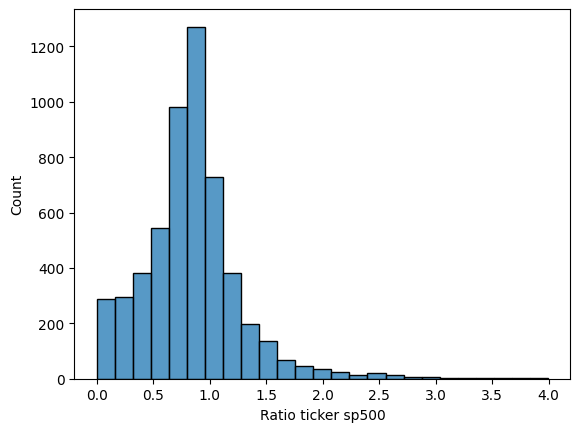

In [22]:
sns.histplot(df_filtered['Ratio ticker sp500'],bins=25)

In [23]:
df_filtered = df_filtered.dropna()

In [24]:
X = df_filtered.drop(columns = ['Ticker', 'Ratio ticker sp500'])
y = df_filtered['Ratio ticker sp500']

In [25]:
X = X[['2023 Stockholders Equity', '2023 Total Debt',
       '2023 Current Liabilities', '2023 Total Assets', '2023 Working Capital', 'Net Change', 'Market Cap', 'Volume']]

In [ ]:
X

In [30]:
y_encoded = y.apply(lambda x: 1 if x > 1 else 0)

## Linear regression

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a pipeline
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('regressor', LinearRegression())
])

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
cv_scores

array([-0.01332828, -0.01446466,  0.007413  ,  0.02058251, -0.07755633])

In [32]:
#the score of the linearRegression is really bad

## Knn 

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

# KNN
# Create a pipeline with RobustScaler and KNN Classifier
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors=2))  # You can choose a different number of neighbors
])

# Define the cross-validation strategy
#cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y_encoded, cv=5, scoring='accuracy')

In [34]:
cv_scores.mean()

0.7036753162803583

In [35]:
X.columns

Index(['2023 Stockholders Equity', '2023 Total Debt',
       '2023 Current Liabilities', '2023 Total Assets', '2023 Working Capital',
       'Net Change', 'Market Cap', 'Volume'],
      dtype='object')

In [36]:
y

0       0.951659
1       0.863139
2       0.489011
3       0.869077
6       0.197612
          ...   
5968    0.971389
5969    0.216835
5970    0.029488
5971    0.780059
5972    0.896673
Name: Ratio ticker sp500, Length: 4161, dtype: float64

In [39]:
df_filtered

,Ticker,Ratio ticker sp500,2023 Stockholders Equity,2023 Total Debt,2023 Current Liabilities,2023 Total Assets,2023 Working Capital,Name,Last Sale,Net Change,% Change,Market Cap,Country,Volume,Sector,Industry
0,A,0.951659,5.845000e+09,2.735000e+09,1.603000e+09,1.076300e+10,2.583000e+09,Agilent Technologies Inc. Common Stock,$145.48,-2.7300,-1.842%,4.263368e+10,United States,1593543,Industrials,Electrical Products
1,AA,0.863139,4.251000e+09,1.915000e+09,3.030000e+09,1.415500e+10,1.375000e+09,Alcoa Corporation Common Stock,$43.93,0.7300,1.69%,7.888057e+09,United States,5272723,Industrials,Aluminum
2,AACG,0.489011,1.130379e+08,2.260687e+07,3.144025e+08,4.489391e+08,-2.439576e+08,ATA Creativity Global American Depositary Shares,$0.85,0.0098,1.166%,2.720011e+07,China,12048,Real Estate,Other Consumer Services
3,AACI,0.869077,1.683079e+07,2.564439e+06,8.587123e+06,2.541792e+07,-8.493234e+06,Armada Acquisition Corp. I Common Stock,$11.3642,-0.0058,-0.051%,0.000000e+00,United States,3672,Finance,Blank Checks
6,AADI,0.197612,1.051950e+08,1.267000e+06,2.639500e+07,1.324230e+08,9.819100e+07,Aadi Bioscience Inc. Common Stock,$1.76,-0.1200,-6.383%,4.321540e+07,United States,353943,Health Care,Biotechnology: Pharmaceutical Preparations
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,ZUO,0.971389,9.716000e+07,2.575670e+08,3.116190e+08,6.685980e+08,2.069330e+08,Zuora Inc. Class A Common Stock,$9.72,0.1500,1.567%,1.419120e+09,United States,1561743,Technology,EDP Services
5969,ZVIA,0.216835,8.987800e+07,1.948000e+06,2.771700e+07,9.085700e+07,5.497000e+07,Zevia PBC Class A Common Stock,$0.89,-0.0181,-1.993%,6.434510e+07,United States,113316,Consumer Staples,Beverages (Production/Distribution)
5970,ZVSA,0.029488,1.107460e+07,8.656000e+03,1.019477e+07,2.211428e+07,-6.841639e+06,ZyVersa Therapeutics Inc. Common Stock,$4.2664,0.0128,0.301%,3.562000e+06,United States,30162,Health Care,Biotechnology: Pharmaceutical Preparations
5971,ZYME,0.780059,4.648060e+08,2.672200e+07,5.576300e+07,5.808800e+08,3.571630e+08,Zymeworks Inc. Common Stock,$8.48,-0.2300,-2.641%,5.995775e+08,United States,555490,Health Care,Biotechnology: Pharmaceutical Preparations


<Axes: xlabel='Ratio ticker sp500', ylabel='Count'>

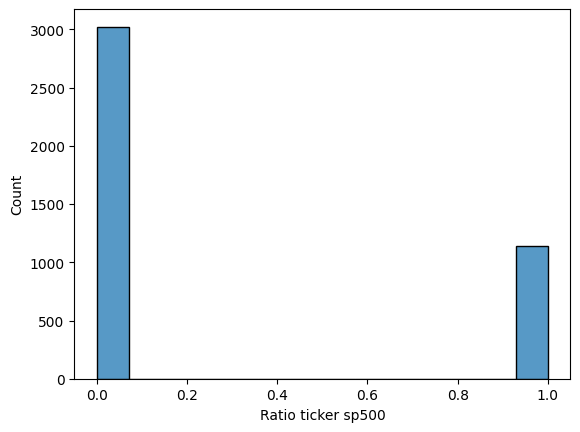

In [38]:
sns.histplot(y_encoded)

In [ ]:
df_filtered

In [ ]:
len(X_train.columns)

In [ ]:
df_filtered

In [ ]:
sns.pairplot(X_train)

In [ ]:
sns.histplot(y_train, bins=30)

In [ ]:
y 

In [ ]:
sns.heatmap(X_train.corr())

In [ ]:
y_train


In [ ]:

feature_names = X.columns.to_list()

# Select the best 2 features
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = [feature_names[i] for i in selector.get_support(indices=True)]

# Create a new DataFrame with the selected features
X_selected_df = pd.DataFrame(X_new, columns=selected_features)

In [ ]:
X_selected_df 

In [ ]:
sns.heatmap(X.corr(), annot=True)

In [ ]:
sns.pairplot(X_selected_df)

In [ ]:
X_selected_df

## Cross validation 

### cross validation on the full data

In [ ]:
# features selection for the cross validation
X = X_train
y = y_train

In [ ]:
# cross validation on the data
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

# Step 3: Create the linear regression model
model = Ridge()

# Step 4: Perform cross-validation
# We'll use 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
scores

### cross validation on the features selected

In [ ]:
# features selection for the cross validation
## features selected using only year 2023 and using SelectKBest with k = 10
X_reduced = X_selected_df.drop(columns = ['pipeline__2023 Accumulated Depreciation'])
X_reduced

In [ ]:
X = X_reduced
y = y_train

In [ ]:
# Step 3: Create the linear regression model
model = Ridge()

# Step 4: Perform cross-validation
# We'll use 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Convert negative MSE to positive for easier interpretation
scores

## classification unsupervised


In [ ]:
# features selection for the cross validation
X=pd.DataFrame()
X = X_train
y = y_train

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# Apply K-Means clustering
kmeans = KMeans(n_clusters=9, random_state=42)  # Adjust n_clusters as needed
clusters = kmeans.fit_predict(X)



In [ ]:

# Add the cluster labels to the original DataFrame
X['Cluster'] = clusters

# Evaluate the clustering
silhouette_avg = silhouette_score(X, clusters)
print(f'Silhouette Score: {silhouette_avg}')



In [ ]:
# Plot the clusters (for visualization, use the first two principal components)
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
sns.histplot(X['Cluster'])

In [ ]:
y

## Neural network

In [ ]:
# binary classification
# Define the threshold
threshold = 1.0  # Set your desired threshold value

# Create the binary target column
df['binary_target'] = (df['Ratio ticker sp500'] > threshold).astype(int)

# Prepare the target
y = df['binary_target']


In [ ]:
y

In [ ]:
X_train.shape[1]

In [ ]:
X_train

In [ ]:
X_selected_df.columns 

In [ ]:
X_col = X_selected_df[['pipeline__2023 Cash And Cash Equivalents','pipeline__2023 Gross PPE','pipeline__2023 Current Assets']]

In [ ]:
X_col

In [ ]:
y.shape

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# try a neural network 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # First hidden layer with 64 neurons
    Dense(32, activation='relu'),  # Second hidden layer with 32 neurons
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')